In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
v5n = pd.read_csv('yolov5n/train.csv', skipinitialspace=True)
v8n = pd.read_csv('yolov8n/train.csv', skipinitialspace=True)
v8x = pd.read_csv('yolov8x/train.csv', skipinitialspace=True)

In [3]:
v5n.head(10)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.7641,2.46400,1.09260,0.83886,0.73747,0.81532,0.43814,1.5955,1.35220,1.05970,0.000416,0.000416,0.000416
1,2,1.6593,1.28940,1.06270,0.85727,0.79574,0.87533,0.47960,1.5174,0.95845,1.02240,0.000816,0.000816,0.000816
2,3,1.6250,1.09930,1.04700,0.86841,0.78175,0.86230,0.46474,1.5443,0.97410,1.01570,0.001200,0.001200,0.001200
3,4,1.5812,1.04120,1.04310,0.94323,0.84927,0.91175,0.50409,1.5077,0.85470,1.01980,0.001176,0.001176,0.001176
4,5,1.5280,0.97414,1.02070,0.91688,0.84334,0.90284,0.51905,1.4551,0.87334,0.99387,0.001176,0.001176,0.001176
5,6,1.5049,0.91982,1.00970,0.90118,0.88288,0.91655,0.54746,1.3907,0.80833,0.97054,0.001151,0.001151,0.001151
6,7,1.4522,0.87308,0.99467,0.94072,0.88418,0.93156,0.56207,1.3709,0.76993,0.96553,0.001126,0.001126,0.001126
7,8,1.4485,0.85477,0.99351,0.93224,0.90266,0.94250,0.56627,1.3298,0.75504,0.95966,0.001102,0.001102,0.001102
8,9,1.4316,0.84515,0.98772,0.95647,0.91466,0.94338,0.57277,1.3249,0.70308,0.94962,0.001077,0.001077,0.001077
9,10,1.3989,0.81935,0.98015,0.94783,0.92722,0.95935,0.59809,1.3092,0.69969,0.94422,0.001052,0.001052,0.001052


In [4]:
models = [(v5n, 'YOLOv5n'), (v8n, 'YOLOv8n'), (v8x, 'YOLOv8x')]
valid = ['val/box_loss', 'val/cls_loss', 'val/dfl_loss']
mAP = ['metrics/mAP50(B)', 'metrics/mAP50-95(B)']
training_metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)']

In [5]:
def compare_metrics(models, metrics):
    
    plt.figure(figsize=(6, 4 * len(metrics)))
    for i, metric in enumerate(metrics):
        plt.subplot(len(metrics), 1, i + 1)
        
        for model, name in models:
            plt.plot(model['epoch'], model[metric], label=f'{name} - {metric}')
            
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.title(f'Comparison of {metric} over epochs')
        plt.legend()

    plt.tight_layout()
    plt.show()

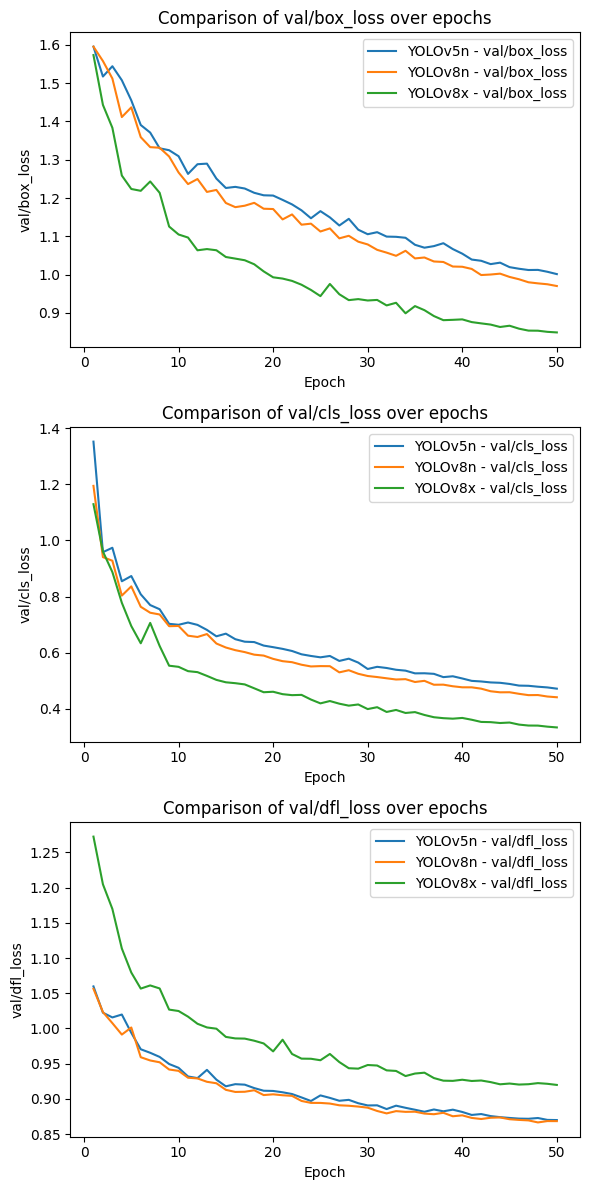

In [6]:
compare_metrics(models, valid)

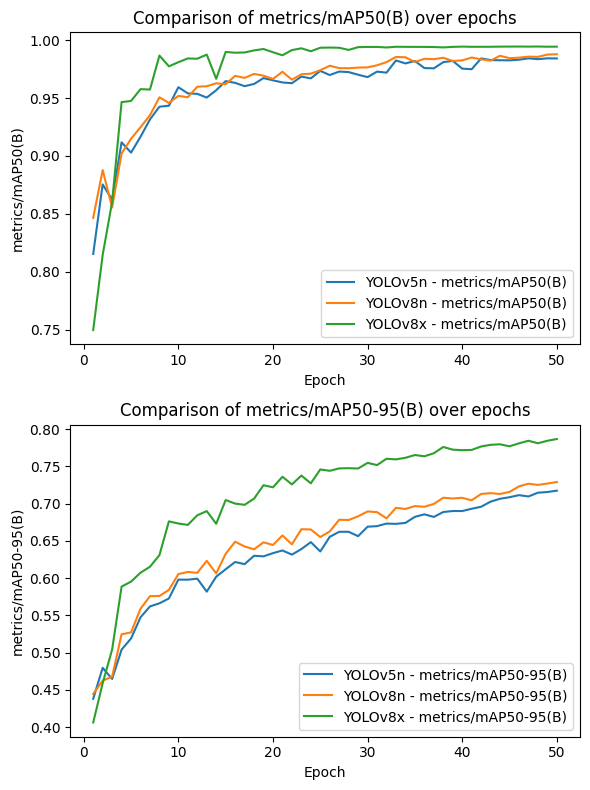

In [7]:
compare_metrics(models, mAP)

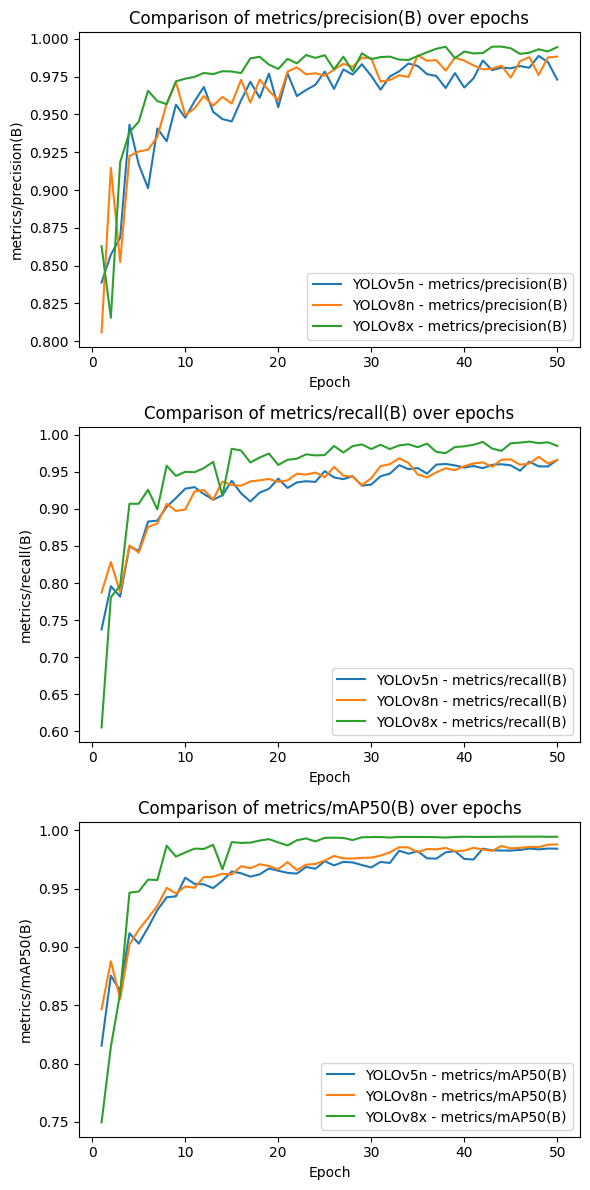

In [8]:
compare_metrics(models, training_metrics)

In [9]:
v5n_val = pd.read_csv('yolov5n/val.csv')
v8n_val = pd.read_csv('yolov8n/val.csv')
v8x_val = pd.read_csv('yolov8x/val.csv')

models_val = [(v5n_val, 'YOLOv5n'), (v8n_val, 'YOLOv8n'), (v8x_val, 'YOLOv8x')]

classes = ['all', 'dropped spike', 'enemy', 'planted spike', 'teammate']
metrics_val = ['Box(P)', 'R', 'mAP50', 'mAP50-95']

In [10]:
v8x_val

,Class,Images,Instances,Box(P),R,mAP50,mAP50-95
0,all,1983,2072,0.998,0.978,0.987,0.792
1,dropped spike,1983,117,1.000,0.957,0.978,0.792
2,enemy,1983,1047,0.995,0.962,0.979,0.794
3,planted spike,1983,162,1.000,0.994,0.995,0.779
4,teammate,1983,746,0.997,0.999,0.995,0.802


In [11]:
def plot_val_metric(models, metrics, metric_name):
    for metric in metrics:
        plt.figure()
        
        values = []
        for model, name in models:
            value = model.loc[model['Class'] == f'{metric_name}', metric].values[0]
            plt.bar(name, value, label=f'{name}-{value:.3f}')
            values.append(value)
            
        plt.ylabel(metric)
        plt.title(f'Comparison of {metric} | Class {metric_name}')
        plt.ylim(min(values)-0.001, max(values)+0.001)
        
        plt.legend()
        plt.show()

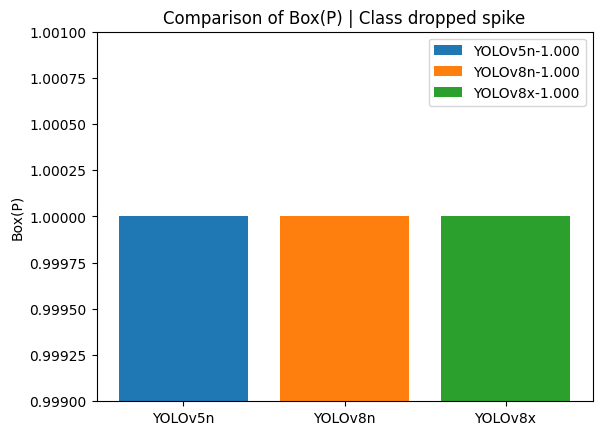

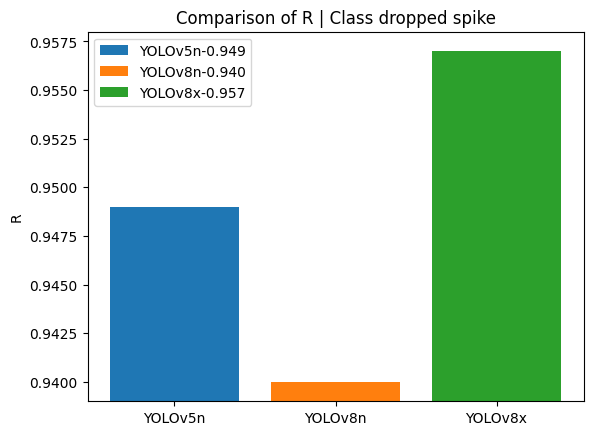

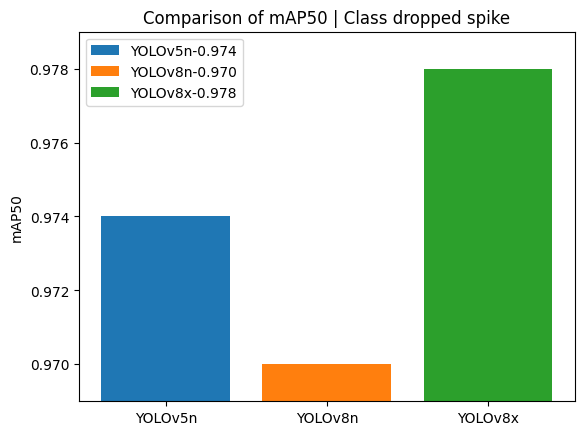

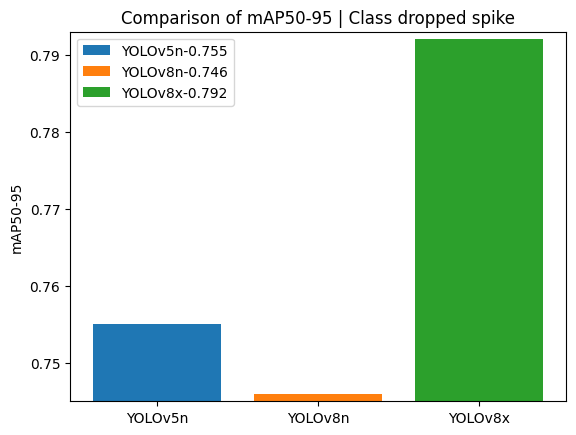

In [12]:
plot_val_metric(models_val, metrics_val, 'dropped spike')

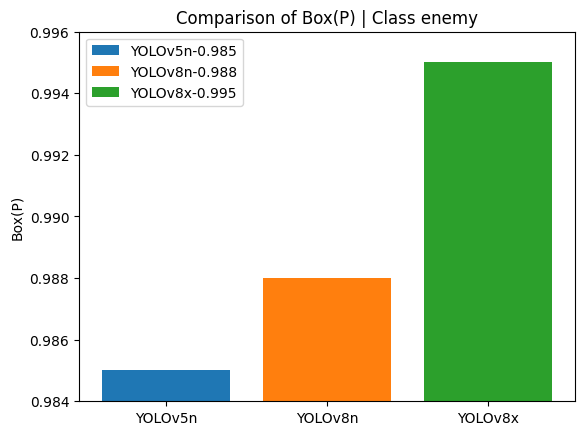

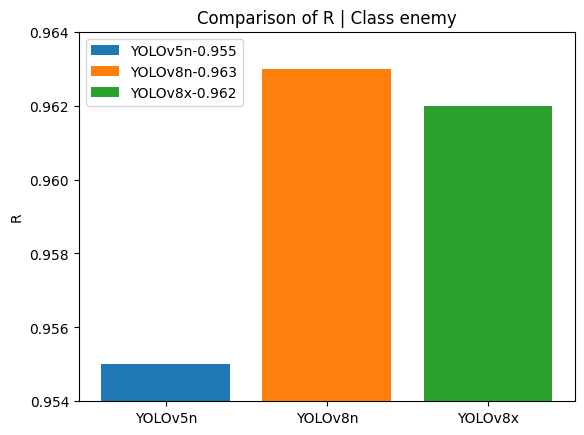

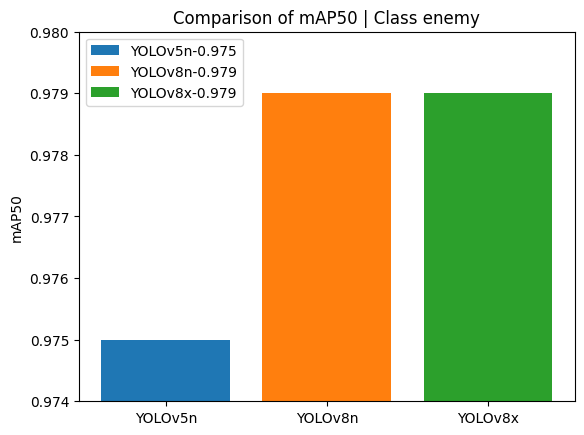

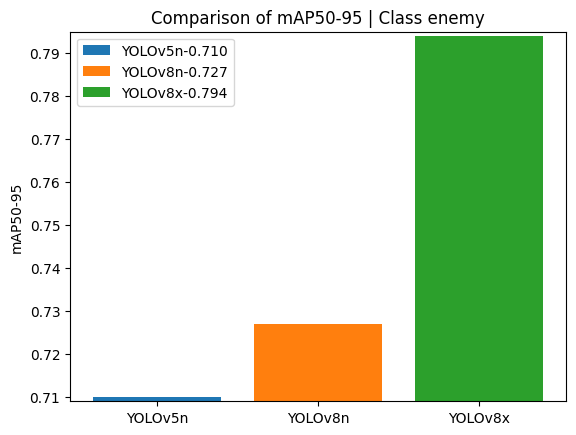

In [13]:
plot_val_metric(models_val, metrics_val, 'enemy')

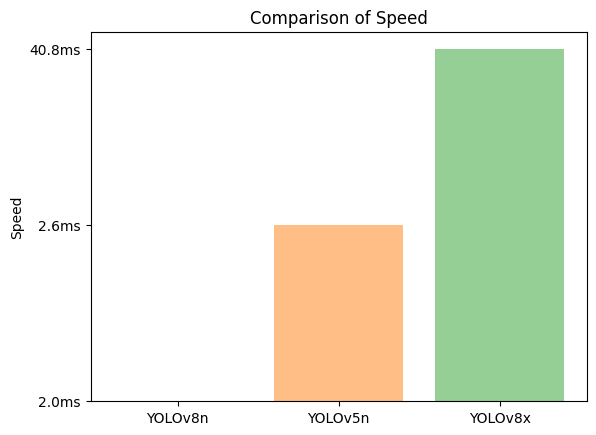

In [15]:
v5n_speed = pd.read_csv('yolov5n/speed.csv')
v8n_speed = pd.read_csv('yolov8n/speed.csv')
v8x_speed = pd.read_csv('yolov8x/speed.csv')

models_speed = [(v8n_speed, 'YOLOv8n'), (v5n_speed, 'YOLOv5n'), (v8x_speed, 'YOLOv8x')]

def plot_speed(models):
    plt.figure()
    
    for model, name in models:
        speed_value = model.loc[model['Speed Metrics'] == 'inference', 'Unnamed: 1'].values[0]
        plt.bar(name, speed_value, alpha=0.5)
    
    plt.ylabel('Speed')
    plt.title(f'Comparison of Speed')
    plt.show()

plot_speed(models_speed)